In [1]:
import numpy as np # linear algebra import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd
import os

In [2]:
%matplotlib inline 

import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df= pd.read_csv('covid_19_data.csv')
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [4]:
df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])
df['Last Update'] = pd.to_datetime(df['Last Update'])
df['Confirmed']=df['Confirmed'].astype('int')
df['Deaths']=df['Deaths'].astype('int')
df['Recovered']=df['Recovered'].astype('int')

In [5]:
#Data Available till 30th JUNE
from datetime import date
recent=df[['ObservationDate']][-1:].max()
df_update=df.loc[df.ObservationDate==pd.Timestamp(recent['ObservationDate'])]
#df_update=df.loc[df.ObservationDate<pd.Timestamp(date(2020,4,30))]
df_update

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
53198,53199,2020-06-30,NaN,Afghanistan,2020-07-01 04:33:52,31517,746,14131
53199,53200,2020-06-30,NaN,Albania,2020-07-01 04:33:52,2535,62,1459
53200,53201,2020-06-30,NaN,Algeria,2020-07-01 04:33:52,13907,912,9897
53201,53202,2020-06-30,NaN,Andorra,2020-07-01 04:33:52,855,52,799
53202,53203,2020-06-30,NaN,Angola,2020-07-01 04:33:52,284,13,93
...,...,...,...,...,...,...,...,...
53922,53923,2020-06-30,Zacatecas,Mexico,2020-07-01 04:33:52,908,96,626
53923,53924,2020-06-30,Zakarpattia Oblast,Ukraine,2020-07-01 04:33:52,2889,91,943
53924,53925,2020-06-30,Zaporizhia Oblast,Ukraine,2020-07-01 04:33:52,572,17,418
53925,53926,2020-06-30,Zhejiang,Mainland China,2020-07-01 04:33:52,1269,1,1267


In [6]:
df_update['Province/State']=df_update.apply(lambda x: x['Country/Region'] if pd.isnull(x['Province/State']) else x['Province/State'],axis=1)
df['Province/State']=df.apply(lambda x: x['Country/Region'] if pd.isnull(x['Province/State']) else x['Province/State'],axis=1)

In [7]:
df_update['Country/Region']=df_update.apply(lambda x:'China' if x['Country/Region']=='Mainland China' else x['Country/Region'],axis=1)
df['Country/Region']=df.apply(lambda x:'China' if x['Country/Region']=='Mainland China' else x['Country/Region'],axis=1)

In [8]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_update['ProvinceID'] = le.fit_transform(df_update['Province/State'])
df_update['CountryID']=le.fit_transform(df_update['Country/Region'])
df_update.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,ProvinceID,CountryID
53198,53199,2020-06-30,Afghanistan,Afghanistan,2020-07-01 04:33:52,31517,746,14131,3,0
53199,53200,2020-06-30,Albania,Albania,2020-07-01 04:33:52,2535,62,1459,10,1
53200,53201,2020-06-30,Algeria,Algeria,2020-07-01 04:33:52,13907,912,9897,12,2
53201,53202,2020-06-30,Andorra,Andorra,2020-07-01 04:33:52,855,52,799,22,3
53202,53203,2020-06-30,Angola,Angola,2020-07-01 04:33:52,284,13,93,23,4


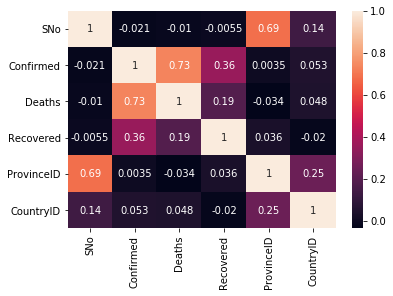

In [9]:
corr= df_update.corr()
sns.heatmap(corr,annot=True)

In [10]:
print(df['Country/Region'].unique())
print("\nNumber of countries impacted by COVID 2019:",len(df['Country/Region'].unique()))

['China' 'Hong Kong' 'Macau' 'Taiwan' 'US' 'Japan' 'Thailand'
 'South Korea' 'Singapore' 'Philippines' 'Malaysia' 'Vietnam' 'Australia'
 'Mexico' 'Brazil' 'Colombia' 'France' 'Nepal' 'Canada' 'Cambodia'
 'Sri Lanka' 'Ivory Coast' 'Germany' 'Finland' 'United Arab Emirates'
 'India' 'Italy' 'UK' 'Russia' 'Sweden' 'Spain' 'Belgium' 'Others' 'Egypt'
 'Iran' 'Israel' 'Lebanon' 'Iraq' 'Oman' 'Afghanistan' 'Bahrain' 'Kuwait'
 'Austria' 'Algeria' 'Croatia' 'Switzerland' 'Pakistan' 'Georgia' 'Greece'
 'North Macedonia' 'Norway' 'Romania' 'Denmark' 'Estonia' 'Netherlands'
 'San Marino' ' Azerbaijan' 'Belarus' 'Iceland' 'Lithuania' 'New Zealand'
 'Nigeria' 'North Ireland' 'Ireland' 'Luxembourg' 'Monaco' 'Qatar'
 'Ecuador' 'Azerbaijan' 'Czech Republic' 'Armenia' 'Dominican Republic'
 'Indonesia' 'Portugal' 'Andorra' 'Latvia' 'Morocco' 'Saudi Arabia'
 'Senegal' 'Argentina' 'Chile' 'Jordan' 'Ukraine' 'Saint Barthelemy'
 'Hungary' 'Faroe Islands' 'Gibraltar' 'Liechtenstein' 'Poland' 'Tunisia'
 'Pales

In [11]:
group_cases=df_update[['Confirmed','Recovered','Deaths','Country/Region']].groupby('Country/Region').sum().sort_values('Confirmed',ascending=False).head()
group_cases=group_cases.reset_index()
group_cases

,Country/Region,Confirmed,Recovered,Deaths
0,US,2635417,720631,127417
1,Brazil,1402041,788318,59594
2,Russia,646929,411973,9306
3,India,585493,347979,17400
4,UK,314160,1370,43815


In [12]:
group_cases['Recovery Rate']=round(group_cases['Recovered'] / group_cases['Confirmed'],2)
group_cases['Death Rate']=round(group_cases['Deaths'] / group_cases['Confirmed'],2)
group_cases=group_cases.sort_values(by='Confirmed', ascending= False)
group_cases.style.background_gradient(cmap='Greens')

,Country/Region,Confirmed,Recovered,Deaths,Recovery Rate,Death Rate
0,US,2635417,720631,127417,0.270000,0.050000
1,Brazil,1402041,788318,59594,0.560000,0.040000
2,Russia,646929,411973,9306,0.640000,0.010000
3,India,585493,347979,17400,0.590000,0.030000
4,UK,314160,1370,43815,0.000000,0.140000


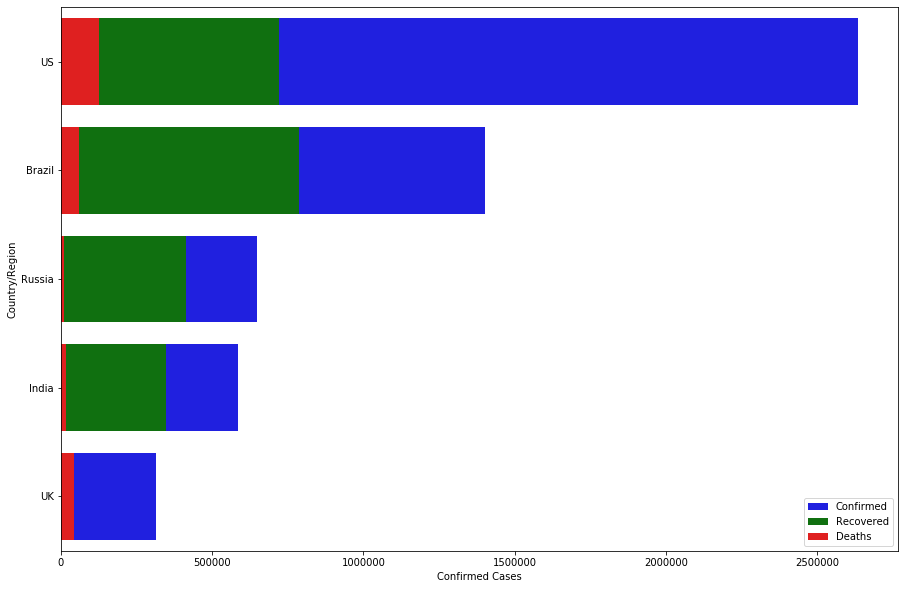

In [13]:
f, ax = plt.subplots(figsize=(15, 10))
bar1=sns.barplot(x="Confirmed",y="Country/Region",data=group_cases,
            label="Confirmed", color="b")


bar2=sns.barplot(x="Recovered", y="Country/Region", data=group_cases,
            label="Recovered", color="g")


bar3=sns.barplot(x="Deaths", y="Country/Region", data=group_cases,
            label="Deaths", color="r")

ax.legend(loc=4, ncol = 1)
plt.xlabel("Confirmed Cases")
plt.show()

# NEPAL

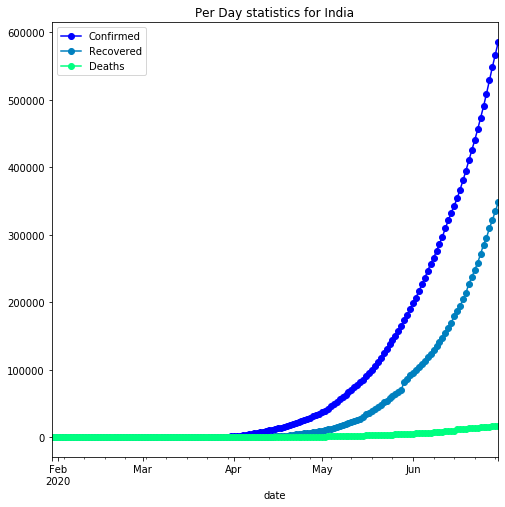

In [14]:
india_cases_complete=df.loc[df['Country/Region']=='India']
india_cases_complete['date'] = india_cases_complete['ObservationDate'].dt.date
india_cases_complete['date']=pd.to_datetime(india_cases_complete['date'])
india_cases_complete = india_cases_complete[india_cases_complete['date'] > pd.Timestamp(date(2020,1,21))]
num_plot = india_cases_complete.groupby('date')["Confirmed", "Recovered", "Deaths"].sum()
num_plot['Confirmed'][132]=287154
num_plot['Recovered'][132]=140928
num_plot['Deaths'][132]=8106
num_plot['Confirmed'][134]=309595
num_plot['Recovered'][134]=154235
num_plot['Deaths'][134]=8888
num_plot['Confirmed'][135]=321634
num_plot['Recovered'][135]=162327
num_plot['Deaths'][135]=9197
num_plot['Confirmed'][136]=333039
num_plot['Recovered'][136]=169684
num_plot['Deaths'][136]=9521
num_plot['Confirmed'][137]=343071
num_plot['Recovered'][137]=180324
num_plot['Deaths'][137]=9917
num_plot.plot(figsize=(8,8),colormap='winter',title='Per Day statistics for India',marker='o')
num_plot_india=num_plot.reset_index()

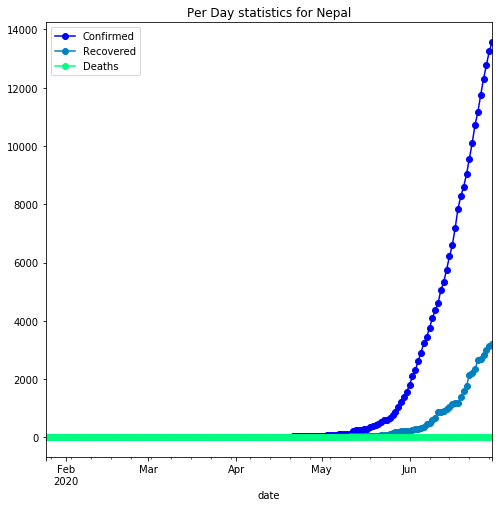

In [19]:
nepal_cases_complete=df.loc[df['Country/Region']=='Nepal']
nepal_cases_complete['date'] = nepal_cases_complete['ObservationDate'].dt.date
nepal_cases_complete['date']=pd.to_datetime(nepal_cases_complete['date'])
nepal_cases_complete = nepal_cases_complete[nepal_cases_complete['date'] > pd.Timestamp(date(2020,1,21))]
num_plot = nepal_cases_complete.groupby('date')["Confirmed", "Recovered", "Deaths"].sum()
num_plot.plot(figsize=(8,8),colormap='winter',title='Per Day statistics for Nepal',marker='o')
num_plot_nepal=num_plot.reset_index()

In [22]:
num_plot_nepal['Confirmed Case Increase']=0
num_plot_nepal['Death Case Increase']=0

for i in range(1,num_plot_nepal.shape[0]):
    num_plot_nepal['Confirmed Case Increase'][i]=-(num_plot_nepal.iloc[i-1][1]-num_plot_nepal.iloc[i][1])
    num_plot_nepal['Death Case Increase'][i]=-(num_plot_nepal.iloc[i-1][3]-num_plot_nepal.iloc[i][3])
num_plot_nepal.tail(10)

,date,Confirmed,Recovered,Deaths,Confirmed Case Increase,Death Case Increase
148,2020-06-21,9026,1772,23,421,1
149,2020-06-22,9561,2148,23,535,0
150,2020-06-23,10099,2224,24,538,1
151,2020-06-24,10728,2338,24,629,0
152,2020-06-25,11162,2650,26,434,2
153,2020-06-26,11755,2698,27,593,1
154,2020-06-27,12309,2834,28,554,1
155,2020-06-28,12772,3013,28,463,0
156,2020-06-29,13248,3134,29,476,1
157,2020-06-30,13564,3194,29,316,0


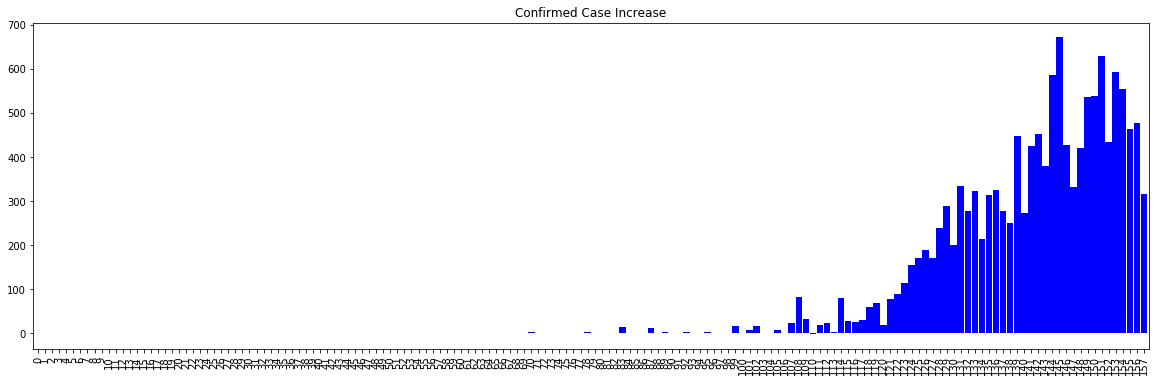

In [23]:
num_plot_nepal['Confirmed Case Increase'].plot(kind='bar',width=0.95,colormap='winter',figsize=(20,6),title='Confirmed Case Increase')
plt.show()

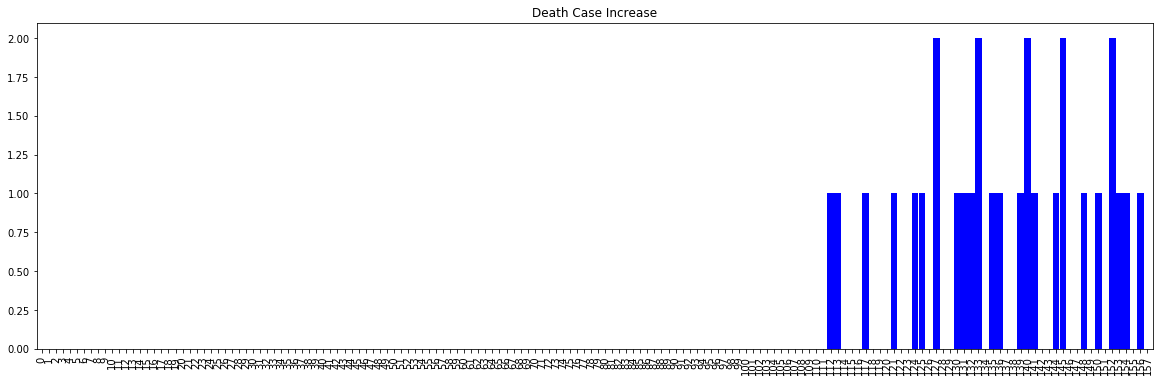

In [24]:
num_plot_nepal['Death Case Increase'].plot(kind='bar',width=0.95,colormap='winter',figsize=(20,6),title='Death Case Increase')
plt.show()

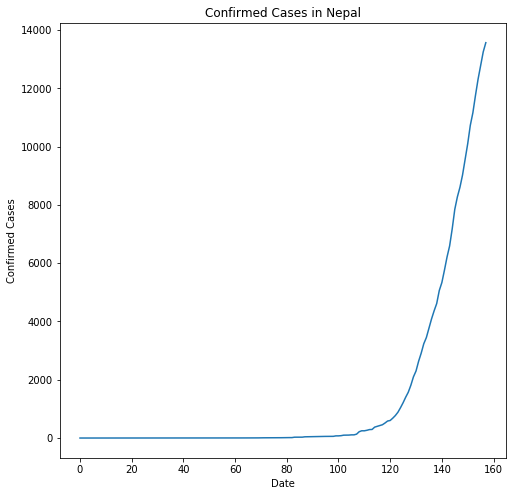

In [25]:
#Current number of confirmed cases
ax = num_plot_nepal['Confirmed'].plot(title="Confirmed Cases in Nepal",figsize=(8,8));
ax.set(xlabel="Date", ylabel="Confirmed Cases");

In [26]:
train = num_plot_india.iloc[:-5,:2]
test = num_plot_india.iloc[-5:,:2]

In [27]:
train.rename(columns={"date":"ds","Confirmed":"y"},inplace=True)
test.rename(columns={"date":"ds","Confirmed":"y"},inplace=True)
test = test.set_index("ds")
test = test['y']

In [28]:
from fbprophet import Prophet
pd.plotting.register_matplotlib_converters()
model = Prophet(changepoint_prior_scale=0.4, changepoints=['2020-04-09','2020-04-15','2020-04-24','2020-05-05','2020-05-17','2020-05-31','2020-06-18'])
model.fit(train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


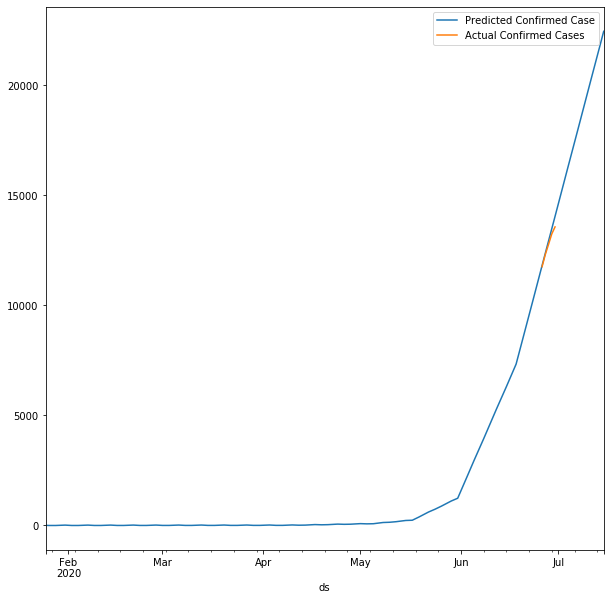

In [29]:
future_dates = model.make_future_dataframe(periods=20)
forecast =  model.predict(future_dates)
ax = forecast.plot(x='ds',y='yhat',label='Predicted Confirmed Case',legend=True,figsize=(10,10))
test.plot(y='y',label='Actual Confirmed Cases',legend=True,ax=ax)

In [30]:
from fbprophet.diagnostics import performance_metrics
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial='70 days', period='40 days', horizon = '3 days')
df_cv.head()
df_p = performance_metrics(df_cv)
df_p.head()

INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-05-13 00:00:00 and 2020-06-22 00:00:00


,horizon,mse,rmse,mae,mape,mdape,coverage
0,1 days,6124.033533,78.256204,70.119416,0.076222,0.076222,0.5
1,2 days,2457.533699,49.573518,48.485076,0.074191,0.074191,0.5
2,3 days,24571.041979,156.751529,131.862207,0.090644,0.090644,0.0


In [31]:
forecast.tail(15)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
158,2020-07-01,14608.407614,14449.701348,14777.555501,14581.423379,14642.427917,0.320578,0.320578,0.320578,0.320578,0.320578,0.320578,0.0,0.0,0.0,14608.728192
159,2020-07-02,15168.853508,14997.038046,15364.074998,15109.998434,15263.547765,6.055879,6.055879,6.055879,6.055879,6.055879,6.055879,0.0,0.0,0.0,15174.909387
160,2020-07-03,15729.299402,15577.528893,15957.749932,15635.058916,15862.940629,10.337433,10.337433,10.337433,10.337433,10.337433,10.337433,0.0,0.0,0.0,15739.636835
161,2020-07-04,16289.745296,16072.925465,16521.245257,16147.221542,16495.359402,0.986077,0.986077,0.986077,0.986077,0.986077,0.986077,0.0,0.0,0.0,16290.731373
162,2020-07-05,16850.191190,16622.390880,17130.470680,16647.423514,17118.782400,-5.513060,-5.513060,-5.513060,-5.513060,-5.513060,-5.513060,0.0,0.0,0.0,16844.678130
163,2020-07-06,17410.637084,17125.835578,17749.486542,17127.031092,17724.013094,-6.324231,-6.324231,-6.324231,-6.324231,-6.324231,-6.324231,0.0,0.0,0.0,17404.312853
164,2020-07-07,17971.082978,17624.660903,18366.255253,17634.835639,18356.517719,-5.862676,-5.862676,-5.862676,-5.862676,-5.862676,-5.862676,0.0,0.0,0.0,17965.220302
165,2020-07-08,18531.528872,18116.957276,19019.489821,18141.641327,19004.387267,0.320578,0.320578,0.320578,0.320578,0.320578,0.320578,0.0,0.0,0.0,18531.849450
166,2020-07-09,19091.974766,18644.594033,19717.132128,18619.924761,19688.321699,6.055879,6.055879,6.055879,6.055879,6.055879,6.055879,0.0,0.0,0.0,19098.030645
167,2020-07-10,19652.420660,19106.911899,20399.336025,19120.463614,20384.957520,10.337433,10.337433,10.337433,10.337433,10.337433,10.337433,0.0,0.0,0.0,19662.758093


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


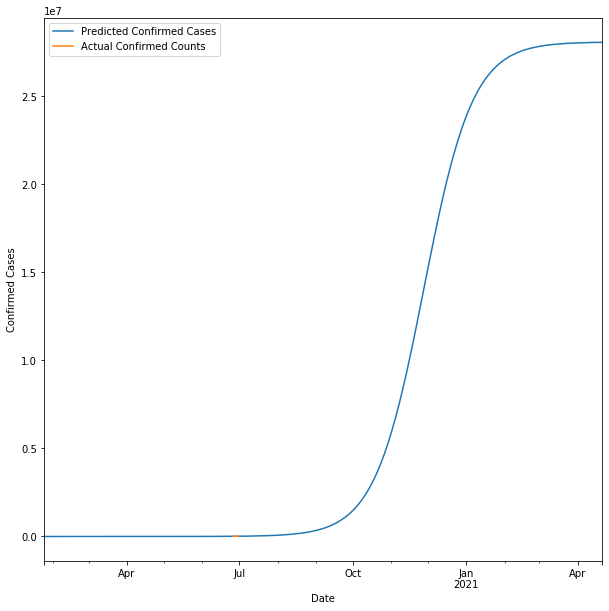

In [33]:
from fbprophet import Prophet
model_nepal = Prophet(growth="logistic",changepoint_prior_scale=0.4,changepoints=['2020-04-09','2020-04-15','2020-04-24','2020-05-05','2020-05-17','2020-05-31','2020-06-18'])
pop = 28090000 #from worldometers
train['cap'] = pop
model_nepal.fit(train)
# Future Prediction
future_dates = model_nepal.make_future_dataframe(periods=300)
future_dates['cap'] = pop
forecast =  model_nepal.predict(future_dates)
# Plotting
ax = forecast.plot(x='ds',y='yhat',label='Predicted Confirmed Cases',legend=True,figsize=(10,10))
test.plot(y='y',label='Actual Confirmed Counts',legend=True,ax=ax)
ax.set(xlabel="Date", ylabel="Confirmed Cases");

In [34]:
forecast.iloc[130:160]

,ds,trend,cap,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
130,2020-06-03,2383.980362,28090000,2302.263203,2488.939433,2383.980362,2383.980362,4.447677,4.447677,4.447677,4.447677,4.447677,4.447677,0.0,0.0,0.0,2388.428039
131,2020-06-04,2581.387827,28090000,2494.054882,2676.532578,2581.387827,2581.387827,1.236318,1.236318,1.236318,1.236318,1.236318,1.236318,0.0,0.0,0.0,2582.624145
132,2020-06-05,2795.140154,28090000,2714.654914,2895.305896,2795.140154,2795.140154,8.432457,8.432457,8.432457,8.432457,8.432457,8.432457,0.0,0.0,0.0,2803.572611
133,2020-06-06,3026.590378,28090000,2923.923143,3116.342034,3026.590378,3026.590378,-0.072790,-0.072790,-0.072790,-0.072790,-0.072790,-0.072790,0.0,0.0,0.0,3026.517588
134,2020-06-07,3277.203488,28090000,3171.257401,3358.084731,3277.203488,3277.203488,-11.392084,-11.392084,-11.392084,-11.392084,-11.392084,-11.392084,0.0,0.0,0.0,3265.811404
135,2020-06-08,3548.565688,28090000,3445.507817,3634.256822,3548.565688,3548.565688,-3.231042,-3.231042,-3.231042,-3.231042,-3.231042,-3.231042,0.0,0.0,0.0,3545.334646
136,2020-06-09,3842.394412,28090000,3753.700655,3935.856195,3842.394412,3842.394412,0.579464,0.579464,0.579464,0.579464,0.579464,0.579464,0.0,0.0,0.0,3842.973876
137,2020-06-10,4160.549170,28090000,4072.423972,4257.541126,4160.549170,4160.549170,4.447677,4.447677,4.447677,4.447677,4.447677,4.447677,0.0,0.0,0.0,4164.996847
138,2020-06-11,4505.043289,28090000,4408.782538,4598.981454,4505.043289,4505.043289,1.236318,1.236318,1.236318,1.236318,1.236318,1.236318,0.0,0.0,0.0,4506.279607
139,2020-06-12,4878.056621,28090000,4795.039335,4978.328935,4878.056621,4878.056621,8.432457,8.432457,8.432457,8.432457,8.432457,8.432457,0.0,0.0,0.0,4886.489078


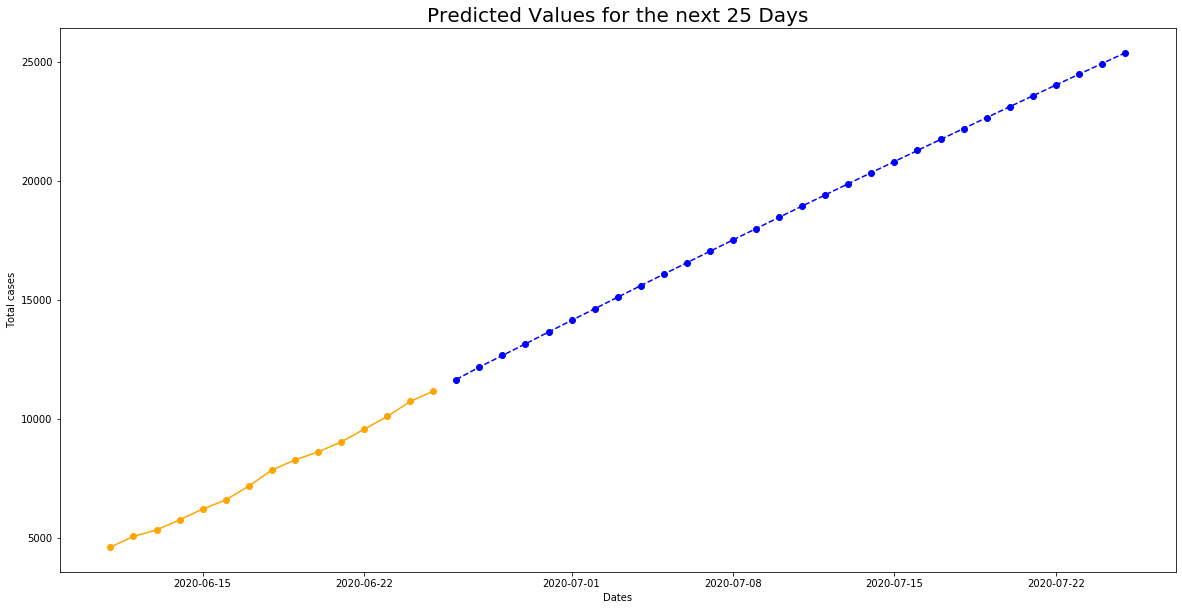

In [35]:
from statsmodels.tsa.arima_model import ARIMA
import datetime
arima = ARIMA(train['y'], order=(3, 1, 0))
arima = arima.fit(trend='nc', full_output=True, disp=True)
forecast = arima.forecast(steps= 30)
pred = list(forecast[0])
start_date = train['ds'].max()
prediction_dates = []
for i in range(30):
    date = start_date + datetime.timedelta(days=1)
    prediction_dates.append(date)
    start_date = date
plt.figure(figsize= (20,10))
plt.xlabel("Dates",fontsize = 10)
plt.ylabel('Total cases',fontsize = 10)
plt.title("Predicted Values for the next 25 Days" , fontsize = 20)

plt.plot_date(y= pred,x= prediction_dates,linestyle ='dashed',color = 'blue',label = 'Predicted')
plt.plot_date(y=train['y'].tail(15),x=train['ds'].tail(15),linestyle = '-',color = 'orange',label = 'Actual')

In [36]:
pred=pd.DataFrame(forecast[0],columns=['Predicted'])
dates=pd.DataFrame(prediction_dates,columns=['Date'])
arima_df=pd.merge(dates,pred,right_index=True,left_index=True)
arima_df.tail(30)

,Date,Predicted
0,2020-06-26,11651.346404
1,2020-06-27,12172.814676
2,2020-06-28,12659.880218
3,2020-06-29,13149.182188
4,2020-06-30,13644.902161
5,2020-07-01,14133.952238
6,2020-07-02,14620.864152
7,2020-07-03,15107.656589
8,2020-07-04,15592.054864
9,2020-07-05,16074.459392
